In [1]:
import numpy as np

In [9]:
# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)


Text(0.5, 1.0, 'Data Distribution')

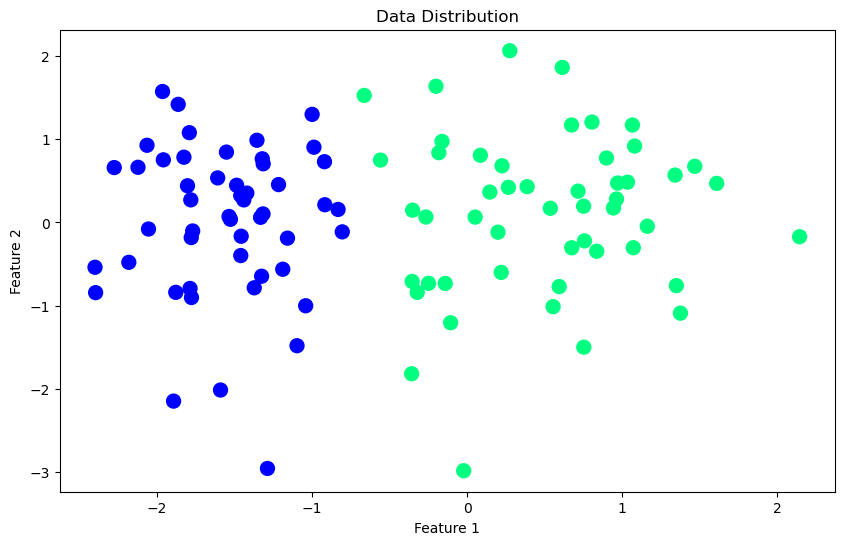

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Distribution')

# Define the perceptron function

In [11]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0, 100)
        distance = np.abs(np.dot(X[j], weights))
        y_hat = step(np.dot(X[j], weights))
        
        # Distance-based weight adjustment
        if y[j] == y_hat:
            # Correctly classified point
            if distance < 1:
                weights = weights + lr * 5 * (y[j] - y_hat) * X[j]  # Push harder if close
            else:
                weights = weights + lr * 0.5 * (y[j] - y_hat) * X[j]  # Push slightly if far
        else:
            # Misclassified point
            if distance < 1:
                weights = weights + lr * 5 * (y[j] - y_hat) * X[j]  # Pull harder if close
            else:
                weights = weights + lr * 0.5 * (y[j] - y_hat) * X[j]  # Pull slightly if far
        
    return weights[0], weights[1:]

# Define the step function
def step(z):
    return 1 if z > 0 else 0


In [12]:
# Train the perceptron
intercept_, coef_ = perceptron(X, y)
print("Coefficients:", coef_)
print("Intercept:", intercept_)


Coefficients: [2.11440466 0.10569263]
Intercept: 1.45


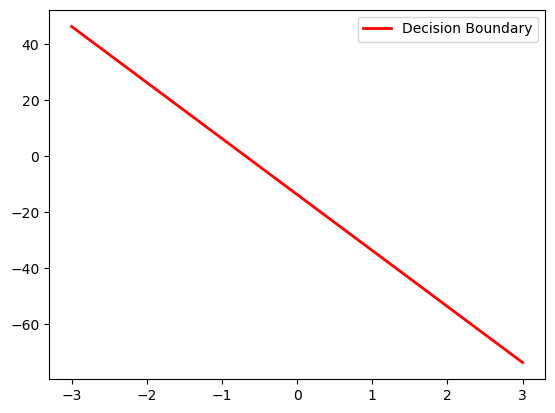

In [13]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b
plt.plot(x_input, y_input, color='red', linewidth=2, label='Decision Boundary')
plt.legend()
plt.show()